# Linear Regression Code Along

Dataset from ISLR - Introduction to Statistical Learning with R
- TV, Radio, Newspaper spending in k$
- Sales in k units

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../Data/Advertising.csv", index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [127]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


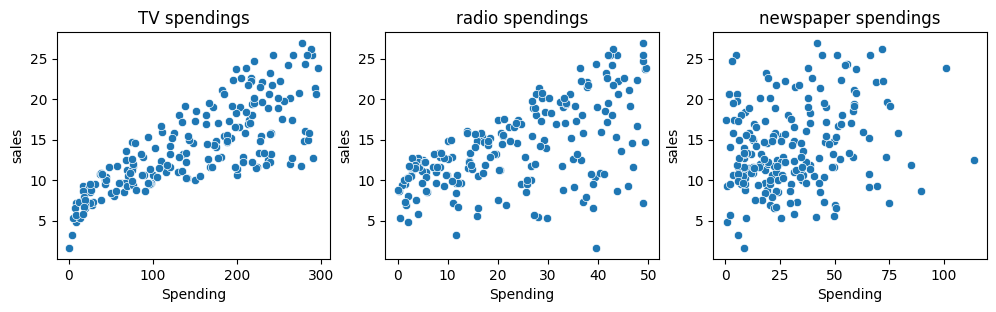

In [128]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3), dpi=100)

for i, feature in enumerate(df.columns[:-1]):
    sns.scatterplot(data = df, x = feature, y = "sales", ax = ax[i])
    ax[i].set(xlabel = "Spending", title = f"{feature} spendings")

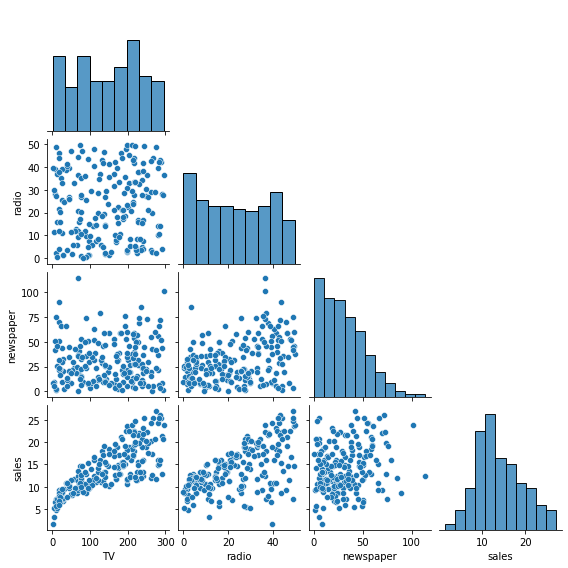

In [129]:
sns.pairplot(df, corner = True, height = 2)

## simple linear regression

Intecept 7.033
Slope 0.048


<AxesSubplot:xlabel='TV', ylabel='sales'>

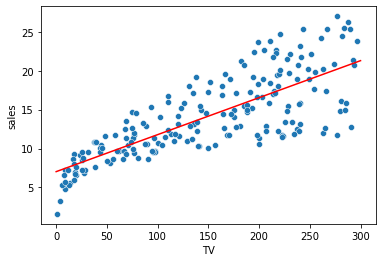

In [130]:
X, y = df["TV"], df["sales"]
beta_1, beta_0 = np.polyfit(X, y, deg = 1) # b1, b0

print(f"Intecept {beta_0:.3f}")
print(f"Slope {beta_1:.3f}")

def y_hat(x): return beta_0 + beta_1*x

spend = np.linspace(0, 300)

sns.scatterplot(data = df, x = "TV", y = "sales")
sns.lineplot(x = spend, y = y_hat(spend), color = "red")

<AxesSubplot:xlabel='TV', ylabel='sales'>

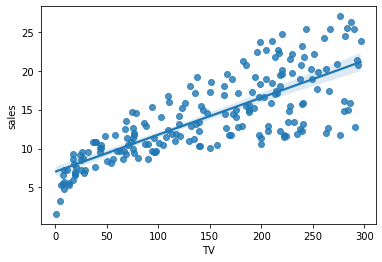

In [131]:
sns.regplot(x = X, y = y)

## Multiple linear regresson

In [132]:
X, y = df.drop("sales", axis="columns"), df["sales"]
X.insert(0, "Intercept", 1)

# OLS normal equation/closed form equation
regression_fit = lambda X, y: np.linalg.pinv(X.T @ X) @ X.T @ y

beta_hat = regression_fit(X, y)
print(beta_hat)

predict = lambda x, beta: np.dot(x, beta)

# data leakage
# dont do this in reality, here we test for sanity
test_sample = [1, 230.1, 37.8, 69.2]

y_hat = predict(test_sample, beta_hat)
print(f"Predicted value for this sample: {y_hat:.2f}")
print(f"Ture value for this sample: {y.iloc[0]}")

0    2.938889
1    0.045765
2    0.188530
3   -0.001037
dtype: float64
Predicted value for this sample: 20.52
Ture value for this sample: 22.1


# Train|Test split

In [133]:
# split 70% training, 30% test
train_fraction = int(len(df)*.7)
print(f"{train_fraction} sample for training data")
print(f"{len(df)-train_fraction} sample for test data")

train = df.sample(n = train_fraction, random_state = 42, replace = False)
test = df.drop(train.index)

print(f"{train.index.isin(test.index).sum()} data from test in training")

X_train, y_train = train.drop("sales", axis=1), train["sales"]
X_test, y_test = test.drop("sales", axis=1), test["sales"]

X_train.insert(0, "Intercept", 1)
X_test.insert(0, "Intercept", 1)


140 sample for training data
60 sample for test data
0 data from test in training


## Prediction

In [134]:
# this uses OLS normal equation
beta_hat = regression_fit(X_train, y_train)
predict = lambda X, weights: X @ weights

y_hat = predict(X_test.to_numpy(), beta_hat.to_numpy().reshape(4,1))



## Evaluation

- MAE - Mean absolute error (easy to interpret)
- MSE - Mean square error (square of original unit, ppunishes oputliners more than MAE, somewhat hard to interpret)
- RMSE - Root mean square error (original unit, punishes outliners more than MAE, easy to interpret)

In [137]:
m = len(y_test)
y_hat = np.reshape(y_hat, m)

MAE = 1/m * np.sum(np.abs(y_test-y_hat))
MSE = 1/m * np.sum(np.abs(y_test-y_hat)**2)
RMSE = np.sqrt(MSE)

MAE, MSE, RMSE

(1.3244490959726218, 3.540425618238503, 1.8816018755939055)